<a href="https://colab.research.google.com/github/machiwao/ml-development/blob/main/Exercise8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 8: Create your own personal face recognition using SVM

## Instructions:

Create a directory in your google drive using this folder structure

```
My Drive
- Images
  - Train
    - Elizer
    - Eliza
    - Eliseo
  - Test
```

- Upload 50 images of your self (selfied are recommended) in the Train folder
- Upload 50 images of each of your partners in the Train folder
- Upload 10 images of any from your or your partners in the Test Folder
- Use **.png** or **.jpg** or **.jpeg** images files

In [1]:
pip install numpy opencv-python scikit-learn

## Import libraries

In [2]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn import svm
from PIL import Image  # PIL is used to load the image
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

## Mount Google Drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Display one raw image directly from your drive

In [4]:
# put your answer here
def displayImage(image_path):
  # Path to your image file in Google Drive
  image = Image.open(image_path)

  # Display the image using matplotlib
  plt.imshow(image)
  plt.axis('off')  # Hide axes for cleaner display
  plt.show()

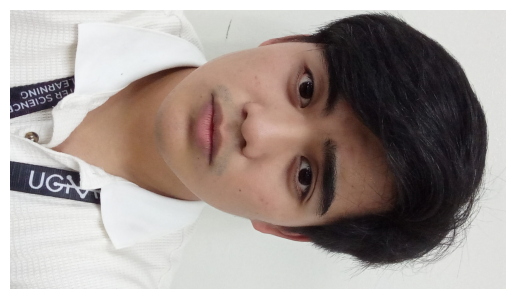

In [5]:
displayImage('/content/drive/MyDrive/Images/Train/Blix/20241011_151253.jpg')

## Load the images from your drive and apply preprocessing to your raw images

In [6]:
# put your answer here
def load_images_from_folder(folder):
    images = []
    labels = []
    for label, person in enumerate(os.listdir(folder)):
        person_folder = os.path.join(folder, person)
        person_name = os.path.basename(person_folder)
        for filename in os.listdir(person_folder):
            img_path = os.path.join(person_folder, filename)
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
            img = cv2.resize(img, (100, 100))  # Resize to 100x100 pixels
            images.append(img.flatten())  # Flatten the image
            labels.append(person_name)
    return np.array(images), np.array(labels)

In [7]:
images, labels = load_images_from_folder('/content/drive/My Drive/Images/Train')

In [8]:
images.shape

(200, 10000)

In [9]:
labels.shape

(200,)

In [10]:
labels

array(['Blix', 'Blix', 'Blix', 'Blix', 'Blix', 'Blix', 'Blix', 'Blix',
       'Blix', 'Blix', 'Blix', 'Blix', 'Blix', 'Blix', 'Blix', 'Blix',
       'Blix', 'Blix', 'Blix', 'Blix', 'Blix', 'Blix', 'Blix', 'Blix',
       'Blix', 'Blix', 'Blix', 'Blix', 'Blix', 'Blix', 'Blix', 'Blix',
       'Blix', 'Blix', 'Blix', 'Blix', 'Blix', 'Blix', 'Blix', 'Blix',
       'Blix', 'Blix', 'Blix', 'Blix', 'Blix', 'Blix', 'Blix', 'Blix',
       'Blix', 'Blix', 'Rodney', 'Rodney', 'Rodney', 'Rodney', 'Rodney',
       'Rodney', 'Rodney', 'Rodney', 'Rodney', 'Rodney', 'Rodney',
       'Rodney', 'Rodney', 'Rodney', 'Rodney', 'Rodney', 'Rodney',
       'Rodney', 'Rodney', 'Rodney', 'Rodney', 'Rodney', 'Rodney',
       'Rodney', 'Rodney', 'Rodney', 'Rodney', 'Rodney', 'Rodney',
       'Rodney', 'Rodney', 'Rodney', 'Rodney', 'Rodney', 'Rodney',
       'Rodney', 'Rodney', 'Rodney', 'Rodney', 'Rodney', 'Rodney',
       'Rodney', 'Rodney', 'Rodney', 'Rodney', 'Rodney', 'Rodney',
       'Rodney', 'Rodney', 'Rodn

In [11]:
for label in np.unique(labels):
    print(f"Number of label {label}: {np.sum(labels == label)}")

Number of label Blix: 50
Number of label Gian: 50
Number of label Mark: 50
Number of label Rodney: 50


## Display one pre-processed image from the training set

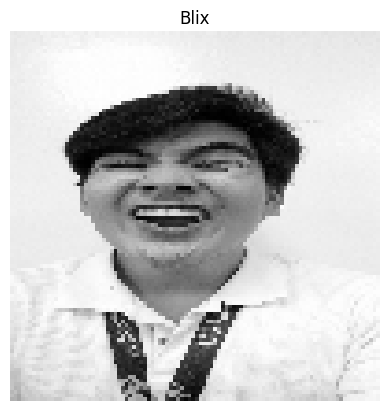

In [12]:
# put your answer here
# Get a sample image and its corresponding name
image = images[0].reshape(100,100)  # Access the first image
name = labels[0]  # Get the name corresponding to the image

# Display the image
plt.imshow(image, cmap="gray")
plt.title(name)
plt.axis('off')  # Hide axes
plt.show()

## Display ten pre-processed images from the training set

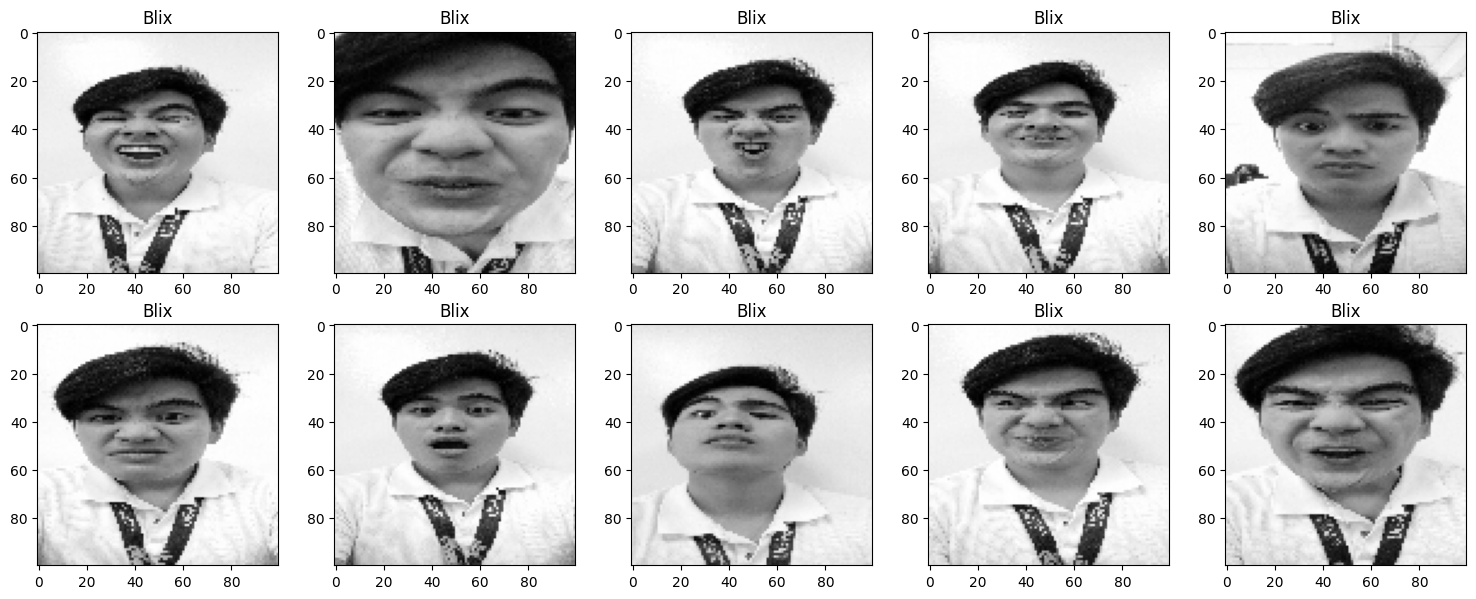

In [13]:
# put your answer here
num_faces = 10

fig, axes = plt.subplots(2, 5, figsize=(15, 6))  # 2 rows and 5 columns
axes = axes.flatten()  # Flatten the array of axes for easy indexing

# Loop to display the images
for i in range(num_faces):
    image = images[i].reshape(100,100)  # Access the i-th image
    name = labels[i]  # Get the name corresponding to the image

    axes[i].imshow(image, cmap='gray')  # Show the image
    axes[i].set_title(name)  # Set the title to the name
    axes[i].axis('on')  # Hide axes

# Adjust layout
plt.tight_layout()
plt.show()

## Split your data

In [70]:
# put your answer here
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.3, random_state=42)

## Train your SVM model

In [71]:
'''param_grid = {
    'C': [0.1, 1, 5, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 'scale'],
    'degree': [2, 3, 4]  # applicable for 'poly' kernel
}'''

In [72]:
'''grid = GridSearchCV(svm.SVC(), param_grid, refit=True, cv=5, return_train_score=True, verbose=0)

# Train with grid search
grid.fit(X_train, y_train)

# Access cv_results_ to extract scores
cv_results = grid.cv_results_

# Iterate over all combinations of parameters
for i in range(len(cv_results['params'])):
    print(f"Iteration {i+1}:")
    print(f"Parameters: {cv_results['params'][i]}")

    # Train accuracy for this iteration
    train_acc = cv_results['mean_train_score'][i]
    print(f"Train Accuracy: {train_acc:.4f}")

    # Test accuracy for this iteration (mean cross-validated test score)
    test_acc = cv_results['mean_test_score'][i]
    print(f"Test Accuracy: {test_acc:.4f}")
    print('-' * 50)
# Evaluate best model on test data
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)
final_test_acc = accuracy_score(y_test, y_pred)
print(f"\nFinal Test Accuracy of Best Model: {final_test_acc:.4f}")'''

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Iteration 1:
Parameters: {'C': 0.1, 'degree': 2, 'gamma': 1, 'kernel': 'linear'}
Train Accuracy: 1.0000
Test Accuracy: 0.9429
--------------------------------------------------
Iteration 2:
Parameters: {'C': 0.1, 'degree': 2, 'gamma': 1, 'kernel': 'rbf'}
Train Accuracy: 0.2786
Test Accuracy: 0.2786
--------------------------------------------------
Iteration 3:
Parameters: {'C': 0.1, 'degree': 2, 'gamma': 1, 'kernel': 'poly'}
Train Accuracy: 1.0000
Test Accuracy: 0.9429
--------------------------------------------------
Iteration 4:
Parameters: {'C': 0.1, 'degree': 2, 'gamma': 0.1, 'kernel': 'linear'}
Train Accuracy: 1.0000
Test Accuracy: 0.9429
--------------------------------------------------
Iteration 5:
Parameters: {'C': 0.1, 'degree': 2, 'gamma': 0.1, 'kernel': 'rbf'}
Train Accuracy: 0.2786
Test Accuracy: 0.2786
--------------------------------------------------
Iteration 6:
Parameters: {'C': 0.1, 'degree': 2, 'gamma': 0.1, 'kernel': 'poly'}
Train Accuracy: 1.0000
Test Accuracy: 

In [86]:
'''# Best parameters
print("Best Parameters: ", grid.best_params_)
print("Best Estimator: ", grid.best_estimator_)'''

Best Parameters:  {'C': 1, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}
Best Estimator:  SVC(C=1, degree=2)


In [113]:
# put your answer here
clf = svm.SVC(kernel = 'linear', gamma='scale')  # You can choose different kernels like 'linear', 'rbf', etc.
clf.fit(X_train, y_train)

SVC(kernel='linear')

## Evaluate your model

Accuracy: 96.67%


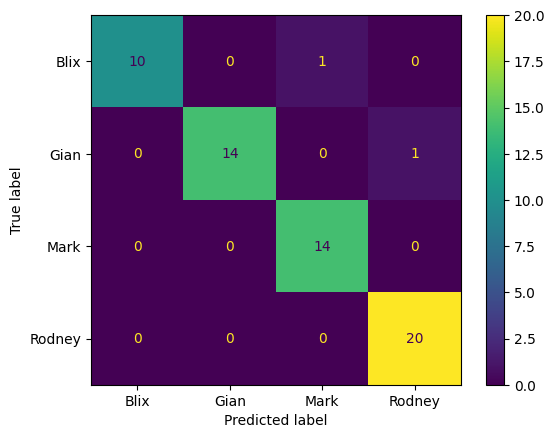

In [114]:
# put your answer here
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

#display confusion metrics
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

## Test your model using images not in your training set

In [115]:
# put your answer here
def predict_image(img_path, model):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (100, 100)).flatten().reshape(1, -1)  # Flatten and reshape for prediction
    prediction = model.predict(img)
    return prediction

Test one image of yourself

Predicted label: ['Blix']


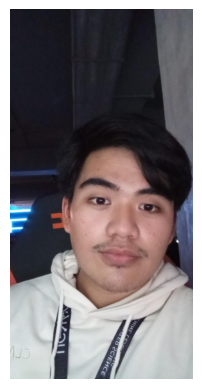

In [116]:
img_path = '/content/drive/My Drive/Images/Test/3.png'
result = predict_image(img_path, clf)
print(f'Predicted label:', result)
displayImage(img_path)

Predicted label: ['Blix']


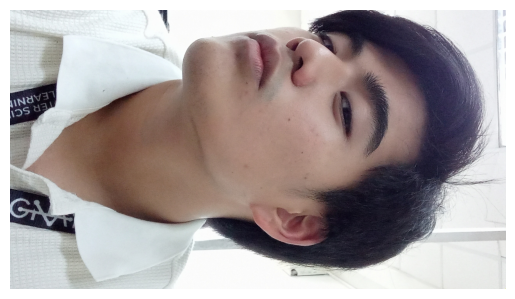

In [117]:
img_path = '/content/drive/My Drive/Images/Test/4.jpg'
result = predict_image(img_path, clf)
print(f'Predicted label:', result)
displayImage(img_path)

Predicted label: ['Blix']


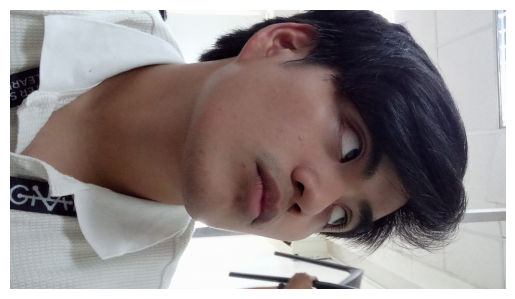

In [118]:
img_path = '/content/drive/My Drive/Images/Test/5.jpg'
result = predict_image(img_path, clf)
print(f'Predicted label:', result)
displayImage(img_path)

Test one image of your partner

Predicted label: ['Gian']


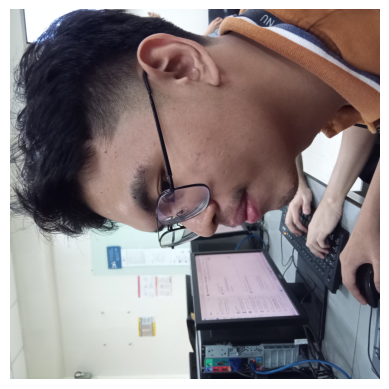

In [119]:
img_path = '/content/drive/My Drive/Images/Test/1.jpg'
result = predict_image(img_path, clf)
print(f'Predicted label:', result)
displayImage(img_path)

Predicted label: ['Rodney']


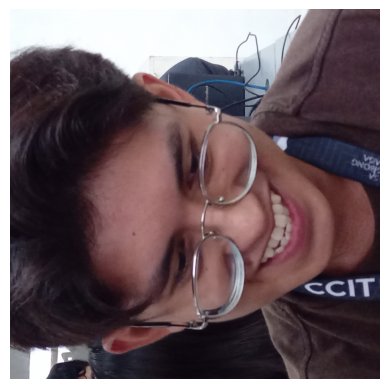

In [120]:
img_path = '/content/drive/My Drive/Images/Test/2.jpg'
result = predict_image(img_path, clf)
print(f'Predicted label:', result)
displayImage(img_path)

Predicted label: ['Mark']


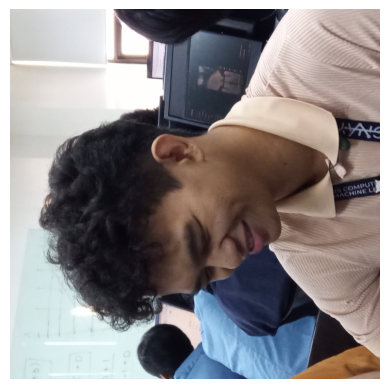

In [121]:
img_path = '/content/drive/My Drive/Images/Test/6.jpg'
result = predict_image(img_path, clf)
print(f'Predicted label:', result)
displayImage(img_path)

Predicted label: ['Mark']


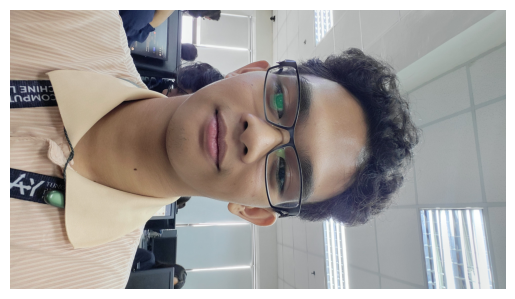

In [122]:
img_path = '/content/drive/My Drive/Images/Test/7.jpg'
result = predict_image(img_path, clf)
print(f'Predicted label:', result)
displayImage(img_path)

Predicted label: ['Gian']


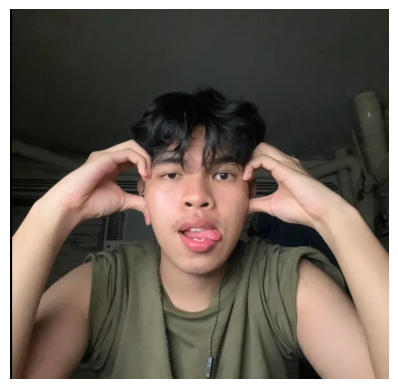

In [123]:
img_path = '/content/drive/My Drive/Images/Test/8.jpg'
result = predict_image(img_path, clf)
print(f'Predicted label:', result)
displayImage(img_path)

Predicted label: ['Mark']


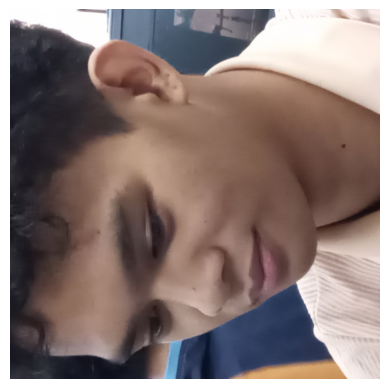

In [124]:
img_path = '/content/drive/My Drive/Images/Test/9.jpg'
result = predict_image(img_path, clf)
print(f'Predicted label:', result)
displayImage(img_path)

Predicted label: ['Rodney']


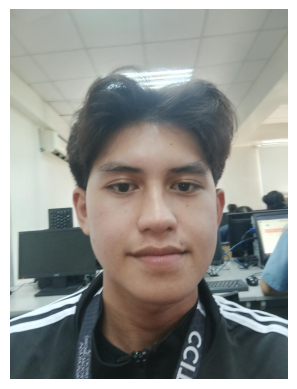

In [125]:
img_path = '/content/drive/My Drive/Images/Test/10.jpg'
result = predict_image(img_path, clf)
print(f'Predicted label:', result)
displayImage(img_path)